In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
  
)
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('./DataSets/heart.csv')

In [3]:
numerical_features_df = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
categorical_features_df = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']]

In [4]:
#removing duplicates
print("Shape of the DataFrame before dropping duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape of the DataFrame after dropping duplicates:", df.shape)

Shape of the DataFrame before dropping duplicates: (303, 14)
Shape of the DataFrame after dropping duplicates: (302, 14)


In [5]:
#replacing outliers
def replace_outliers_with_nulls(data, columns):
    df_copy = data.copy()
    for col in columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Replace only outlier cells with NaN
        df_copy.loc[(df_copy[col] < lower_limit) | (df_copy[col] > upper_limit), col] = np.nan
    return df_copy

#replace the outlires by nulls
df_clean = replace_outliers_with_nulls(df, numerical_features_df)

In [6]:
#fill the outliers by mean
df_filled = df_clean.fillna(df_clean.mean())

In [7]:
# List of numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform only the numerical columns
scaled_values = scaler.fit_transform(df_filled[numerical_cols])

# Create a new DataFrame with the same index and column names
numerical_features_df = pd.DataFrame(scaled_values,
                                     columns=numerical_cols,
                                     index=df_filled.index)

df_filled[numerical_cols] = numerical_features_df[numerical_cols]

display(df_filled.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.671053,0.457265,1,0,0.543860,0,0.575,0,0,1,1
1,0.166667,1,2,0.473684,0.529915,0,1,0.868421,0,0.875,0,0,2,1
2,0.250000,0,1,0.473684,0.333333,0,0,0.736842,0,0.350,2,0,2,1
3,0.562500,1,1,0.342105,0.470085,0,1,0.789474,0,0.200,2,0,2,1
4,0.583333,0,0,0.342105,0.974359,0,1,0.657895,1,0.150,2,0,2,1


In [8]:
#discretization converting continuous features into categorical ones
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(
    n_bins=5,          # use 5 bins (can tune)
    encode='ordinal',  # convert bins to 0,1,2...
    strategy='uniform' # equal-width bins (best after normalization)
)

In [9]:
X = df_filled.drop("target", axis=1)
y = df_filled["target"]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

X[numeric_cols] = discretizer.fit_transform(X[numeric_cols])


In [10]:
print(X.head())

   age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  3.0  4.0  4.0       3.0   2.0  4.0      0.0      2.0    0.0      2.0   
1  0.0  4.0  3.0       2.0   2.0  0.0      2.0      4.0    0.0      4.0   
2  1.0  0.0  1.0       2.0   1.0  0.0      0.0      3.0    0.0      1.0   
3  2.0  4.0  1.0       1.0   2.0  0.0      2.0      3.0    0.0      1.0   
4  2.0  0.0  0.0       1.0   4.0  0.0      2.0      3.0    4.0      0.0   

   slope   ca  thal  
0    0.0  0.0   1.0  
1    0.0  0.0   3.0  
2    4.0  0.0   3.0  
3    4.0  0.0   3.0  
4    4.0  0.0   3.0  


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [12]:

model = CategoricalNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model
print(classification_report(y_test, y_pred))
#evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       0.84      0.90      0.87        42
           1       0.91      0.86      0.88        49

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91

Accuracy: 0.8791208791208791



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        42
           1       0.91      0.86      0.88        49

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91

Accuracy: 0.8791208791208791


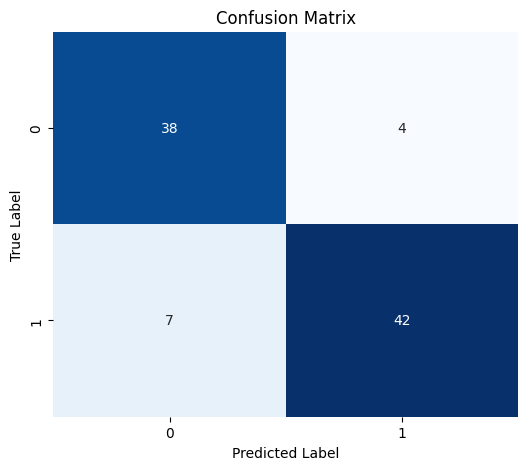

In [14]:



print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


